타이타닉 생존자 분류 데이터 분석
===

Step 1 탐색: 타이타닉 데이터 살펴보기
---

In [2]:
# 타이타닉 데이터셋의 기본 정보 구하기

# -✯- coding: utf-8 -✯-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("python-data-analysis-master/data/titanic_train.csv")
df_test = pd.read_csv("python-data-analysis-master/data/titanic_test.csv")
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [3]:
# 기본 정보 파악
print(df_train.info())
print("--------------")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-nul

In [4]:
# 데이터셋에서 name, ticket, body, cabin, home.dest 피처를 제거
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)
df_test = df_test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)

In [6]:
# 드랍 시킨 컬럼 확인
print(df_train.info())
print("--------------")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       741 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB
None
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   survived  393 non-null    int64  
 2   sex       393 non-null    object 
 3   age       305 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   fa

0    563
1    353
Name: survived, dtype: int64


<AxesSubplot:>

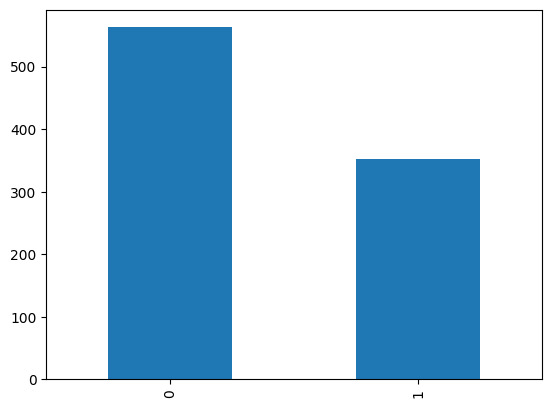

In [8]:
# 탐색적 데이터 붆석
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

3    498
1    230
2    188
Name: pclass, dtype: int64


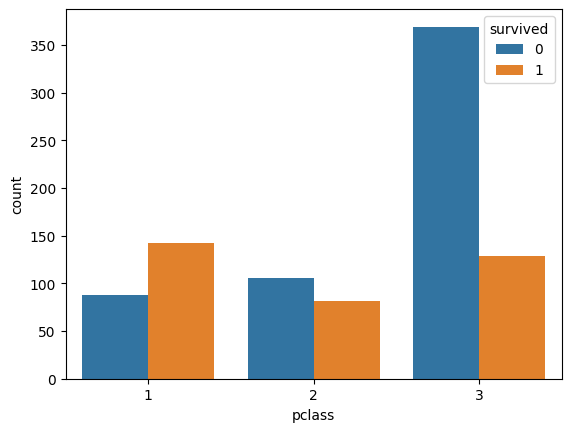

In [9]:
# survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피처의 분포를 살펴봅니다.
print(df_train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue = 'survived', data = df_train)

* 두 그룹 간의 분포를 비교하는 그래프를 출력합니다.
* 두 그룹 각각의 표준편차를 출력합니다.
* 두 그룹 간의 T-test 검정을 실시하여 출력합니다.
* 두 그룹 각각에 Shapiro-wilk 검정을 실히하여 출력합니다.
##### **Shapiro-wilk 검정**
###### Shapiro-wilk 검정이란 주어진 데이터가 얼마나 정규성을 따르는지, 즉 얼마나 정규분포에 가까운지를 측정하는 검정입니다.

In [16]:
# 변수 탐색작업 자동화하기
from scipy import stats

# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check=True):

    # 두 집단 (survived=1, survived=0)의 분포 그래프 출력
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)

    # 두 집단 (survived=1, survived=0)의 표준편차 각각 출력
    titanic_survived = df[df['survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))

    # T-test로 두 집단의 평균 차이 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)
    print("The t-staticstic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-staticstic and p-value not assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)

    if distribution_check:
        # Shapiro-Wilk 검정: 분포의 정규성 정도를 검증합니다.
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))

data std is 14.22
data std is 13.71
The t-staticstic and p-value assuming equal variances is -0.546 and 0.585.
The t-staticstic and p-value not assuming equal variances is -0.543 and 0.587.
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000


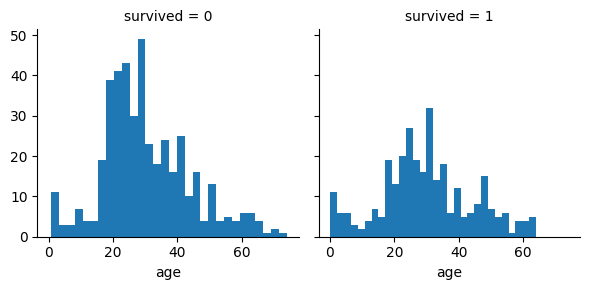

In [17]:
# 자동화 함수 실행
# 앞서 정의한 valid_features 함수를 실행. age, sibsp 피처 탐색
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)


data std is 0.64
data std is 1.34
The t-staticstic and p-value assuming equal variances is -2.118 and 0.034.
The t-staticstic and p-value not assuming equal variances is -2.446 and 0.015.


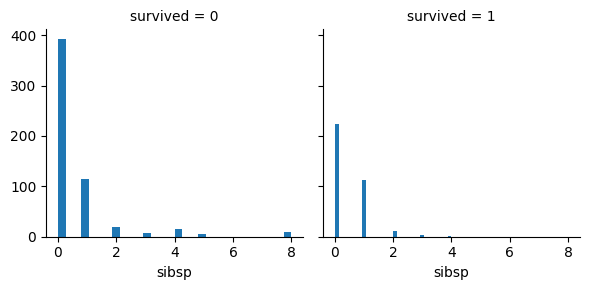

In [18]:
valid_features(df_train, 'sibsp', distribution_check=False)

data std is 0.74
data std is 0.89
The t-staticstic and p-value assuming equal variances is 1.865 and 0.063.
The t-staticstic and p-value not assuming equal variances is 1.942 and 0.052.
The w-statistic and p-value in Survived 0.630 and 0.000
The w-statistic and p-value in Non-Survived 0.421 and 0.000


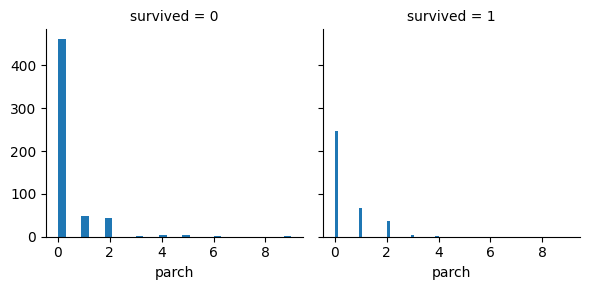

In [19]:
# parch 피처 탐색
valid_features(df_train, 'parch', distribution_check=True)

data std is 60.68
data std is 33.65
The t-staticstic and p-value assuming equal variances is 7.523 and 0.000.
The t-staticstic and p-value not assuming equal variances is 6.657 and 0.000.
The w-statistic and p-value in Survived 0.660 and 0.000
The w-statistic and p-value in Non-Survived 0.520 and 0.000


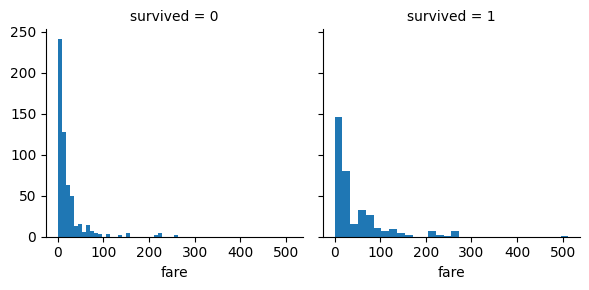

In [20]:
# fare 피처 탐색
valid_features(df_train, 'fare', distribution_check=True)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

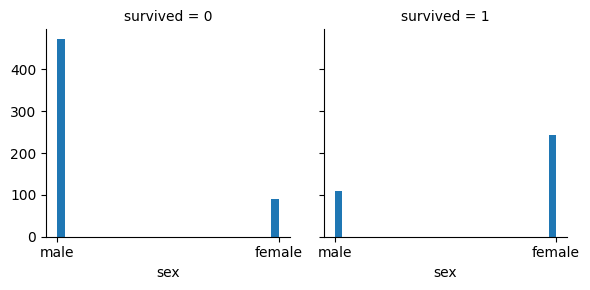

In [28]:
# sex 피처 탐색
valid_features(df_train, 'sex', distribution_check=True)

ConversionError: Failed to convert value(s) to axis units: array(['S', 'S', 'C', 'Q', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'Q', 'C',
       'C', 'S', 'S', 'C', 'S', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'C',
       'S', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S',
       'S', 'C', 'S', 'Q', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S',
       'C', 'Q', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'Q', 'C', 'S', 'S',
       'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'C', 'Q', 'S', 'S', 'S', 'S', 'C', 'C',
       'S', 'S', 'C', 'C', 'S', 'Q', 'Q', 'S', 'Q', 'S', 'S', 'S', 'S',
       'C', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'C', 'S',
       'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'C',
       'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'Q', 'C', 'S', 'C', 'S',
       'S', 'S', 'Q', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C',
       'C', 'C', 'S', 'C', 'C', 'Q', 'S', 'Q', 'S', 'C', 'S', 'Q', 'S',
       'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'C', nan, 'S', 'C', 'S',
       'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'Q', 'C', 'S', 'Q',
       'S', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'C',
       'Q', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', nan, 'S',
       'C', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'C', 'Q',
       'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'C', 'C', 'S', 'Q', 'S', 'Q',
       'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'Q', 'C', 'S', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'C', 'C', 'S', 'C', 'S',
       'C', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'C',
       'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S',
       'Q', 'S'], dtype=object)

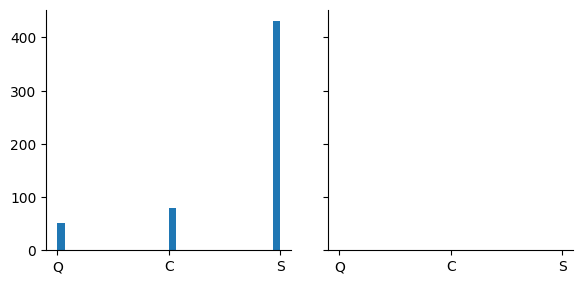

In [29]:
# embarked 피처 탐색
valid_features(df_train, 'embarked', distribution_check=True)